# Initial analysis

In this notebook, we will do some initial analysis over the datasets `quotebank-china.json` and `speaker-attributes.parquet`, exploring them to get a feel of data.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

---

## quotebank-china

`quotebank-china.json` is a derived dataset we extract from the article-centric datasets from 2008 to 2020. It contains all the articles discussing about China, each pairing with a list of quotations. The extraction process can be found in `data_extraction.py`.

In [4]:
path_china_2020 = "data/quotebank-china-2020.json.bz2"
china = pd.read_json(path_china_2020, lines=True)

,articleID,quotations,date,phase,title,url,articleLength,names
0,2020021902_00173921_W,"[{'quotationOffset': 140, 'quoteID': '2020-02-...",2020-02-19 02:56:43,E,Coronavirus LIVE updates : Death toll in China...,http://indiatoday.intoday.in/world/story/coron...,162,"[{'name': 'Antonio Guterres', 'ids': '[Q311440..."
1,2020022222_00009094_W,"[{'quotationOffset': 377, 'quoteID': '2020-02-...",2020-02-22 21:48:25,E,Serbia offers support to China in ` battle ' w...,http://www.expressnews.com/news/world/article/...,521,"[{'name': 'Chen Bo', 'ids': '[Q16727971, Q4545..."
2,2020022305_00042101_W,"[{'quotationOffset': 155, 'quoteID': '2020-02-...",2020-02-23 05:28:44,E,Home News Rajasthan News Congress leader Kodik...,https://www.newkerala.com/news/2020/28896.htm,300,"[{'name': 'Kodikunnil Suresh', 'ids': '[Q64253..."
3,2020022406_00063331_W,"[{'quotationOffset': 1128, 'quoteID': '2020-02...",2020-02-24 01:28:17,E,"South Korean Cases Jump , China Counts 150 Mor...",https://www.nbcwashington.com/news/national-in...,1427,"[{'name': 'Tedros Adhanom Ghebreyesus', 'ids':..."
4,2020022513_00009502_W,"[{'quotationOffset': 120, 'quoteID': '2020-02-...",2020-02-25 13:00:00,E,` The stakes are high ' : Australia urged to d...,http://watoday.com.au/politics/federal/the-sta...,373,"[{'name': 'Tsai Ing-wen', 'ids': '[Q233984]', ..."


In [18]:
china.shape

(72373, 6)

In [19]:
china.head(5)

,articleID,quotations,date,title,articleLength,names
0,2020021902_00173921_W,"[{'quotationOffset': 140, 'quoteID': '2020-02-...",2020-02-19 02:56:43,Coronavirus LIVE updates : Death toll in China...,162,"[{'name': 'Antonio Guterres', 'ids': '[Q311440..."
1,2020022222_00009094_W,"[{'quotationOffset': 377, 'quoteID': '2020-02-...",2020-02-22 21:48:25,Serbia offers support to China in ` battle ' w...,521,"[{'name': 'Chen Bo', 'ids': '[Q16727971, Q4545..."
3,2020022406_00063331_W,"[{'quotationOffset': 1128, 'quoteID': '2020-02...",2020-02-24 01:28:17,"South Korean Cases Jump , China Counts 150 Mor...",1427,"[{'name': 'Tedros Adhanom Ghebreyesus', 'ids':..."
4,2020022513_00009502_W,"[{'quotationOffset': 120, 'quoteID': '2020-02-...",2020-02-25 13:00:00,` The stakes are high ' : Australia urged to d...,373,"[{'name': 'Tsai Ing-wen', 'ids': '[Q233984]', ..."
5,2020022706_00050254_W,"[{'quotationOffset': 183, 'quoteID': '2020-02-...",2020-02-27 06:31:00,"China , South Korea count 767 new virus cases ...",1017,"[{'name': 'President Donald Trump', 'ids': '[Q..."


In [5]:
print("Before checking duplicates, we have %d rows" % len(china))
print("Checking dupliate...\nWe have duplicated %d rows"% china.articleID.duplicated().sum())

Before checking duplicates, we have 76696 rows
Checking dupliate...
We have duplicated 0 rows


In [6]:
print("Checking different values of phase...")
china.phase.value_counts()

Checking different values of phase...


E    76696
Name: phase, dtype: int64

As we can see, all values of `phase` are `E`. Therefore, it's safe to drop this column considering its non-informativeness.

In [7]:
china = china.drop(columns="phase")

In [8]:
print("Checking different values of title...")
china.title.value_counts()

Checking different values of title...


U.S. Says China Is No Longer a Currency Manipulator                                     238
Government arranges to fly Britons back from China amid coronavirus fears               198
China reports new cases , deaths as virus declared emergency                            120
Cases of new viral respiratory illness rise sharply in China                            118
US brings new charges against Chinese tech giant Huawei                                 117
                                                                                       ... 
Chinese citizens barred from US-based cruise company as coronavirus rise continues        1
GMB hit with 841 complaints after Piers Morgan mocks Chinese language                     1
U.S. to review new curbs on Huawei , China in Feb meeting : sources                       1
China Coronavirus Cases Increase As More Preventive Measures Taken CBS San Francisco      1
Joanne Peh remains in China despite growing Wuhan concern                       

Many titles seem to be used by several sources. A plausible reason could be that these articles are reprinted multiple times.

In [9]:
print("Checking missing values...")
china.isna().sum(axis=0)

Checking missing values...


articleID        0
quotations       0
date             0
title            0
url              0
articleLength    0
names            0
dtype: int64

As we can see, there is no column with missing values.

count    76696.000000
mean         3.974940
std          3.505573
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         73.000000
Name: quotations, dtype: float64


<AxesSubplot:xlabel='quotations', ylabel='Count'>

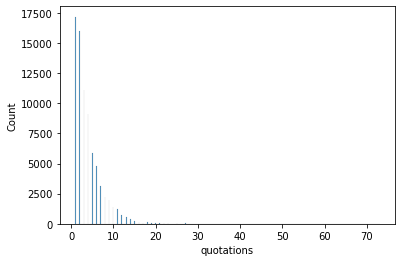

In [11]:
# count the number of quotations for each article
numOfQuotations = china.quotations.apply(lambda x: len(x))

# statistics of `numOfQuotations`
print(numOfQuotations.describe())

sns.histplot(data=numOfQuotations)

count     76696.000000
mean        330.378533
std        1562.650182
min           5.000000
25%          60.000000
50%          73.000000
75%          88.000000
max      147418.000000
Name: title, dtype: float64


<AxesSubplot:>

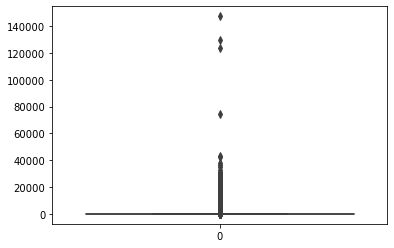

In [12]:
# compute the length of title for each article
titleLength = china.title.apply(lambda x : len(x))

# statistics of `titleLength`
print(titleLength.describe())

sns.boxplot(data=titleLength)

Obviously, most titles have fewer than 100 letters, while some are extremely long. 

- By checking the longest title, we find out that it is due to data collection issues. 
- For convenience, we treat these data as outliers and drop them.
- A significant dividing line for removing outliers is around 160, but we use 200.

In [13]:
# find the article with the longest title
print(china.loc[titleLength.argmax()])

# find the dividing line for removing outliers
print("TitleLength at 0.95: %d" % titleLength.quantile(0.95))
print("TitleLenght at 0.94: %d" % titleLength.quantile(0.94))

# drop outliers
china = china.loc[titleLength < 200]

articleID                                    2020020913_00008796_W
quotations       [{'quotationOffset': 3002, 'quoteID': '2013-11...
date                                           2020-02-09 13:01:25
title            By illconsidered on November 11 , 2013 . This ...
url              http://scienceblogs.com/illconsidered/2013/11/...
articleLength                                                 6325
names            [{'name': 'E. Taylor', 'ids': '[Q58348465]', '...
Name: 34025, dtype: object
TitleLength at 0.95: 1952
TitleLenght at 0.94: 159


We check urls given in the dataset, and realize that they are unreliable. 
- Some urls point to online articles that don't match those given in the dataset. It could be that websites updated these page after they were crawled. 
- Since our project doesn't rely on the information of urls and press media, we decide to drop `url`.

In [14]:
# drop url
china = china.drop(columns=["url"])

In [20]:
# check numbers of names (possible speakers) mentioned
numOfNames = china.names.apply(lambda x: len(x))
numOfNames.value_counts()

1     19034
2     16321
3     12971
4      8202
5      5622
6      3721
7      2069
8      1157
9       723
11      555
10      522
12      267
13      189
14      128
16      128
15      116
18       78
17       66
20       63
19       54
22       39
23       39
25       39
21       39
28       32
27       29
24       21
33       19
30       18
26       17
29       17
31       11
32       10
34        8
43        6
36        5
39        5
35        4
40        3
61        3
46        2
45        2
42        2
38        2
62        2
37        2
72        2
67        2
65        2
78        1
70        1
68        1
52        1
64        1
Name: names, dtype: int64

[Text(0.5, 0, 'date of first four months in 2020'),
 Text(0, 0.5, 'num of articles mentioning china')]

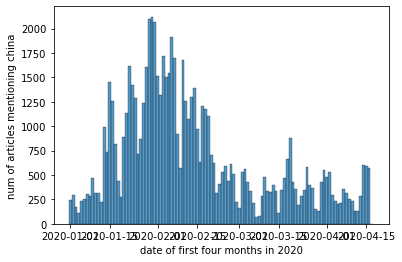

In [26]:
# check the number of articles discussing china over time for the first four months in 2020
sns.histplot(data=china.date.dt.date).set(xlabel="date of first four months in 2020", ylabel="num of articles mentioning china")

We can see a peak around Feburaray, when Covid-19 outbreak in China caught attention.

---

## speaker-attributes


In [29]:
speaker_path = "data/speaker_attributes.parquet"
speaker = pd.read_parquet(speaker_path)

In [28]:
speaker.shape

(9055981, 15)

In [30]:
speaker.head(5)

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [32]:
speaker = speaker.drop_duplicates(subset="id")

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055976,[Barker Howard],None,[Q30],[Q6581097],1397399351,None,None,[Q82955],None,None,Q106406560,Barker B. Howard,None,item,None
9055977,[Charles Macomber],None,[Q30],[Q6581097],1397399471,None,None,[Q82955],None,None,Q106406571,Charles H. Macomber,None,item,None
9055978,None,[+1848-04-01T00:00:00Z],None,[Q6581072],1397399751,None,None,None,None,None,Q106406588,Dina David,None,item,None
9055979,None,[+1899-03-18T00:00:00Z],None,[Q6581072],1397399799,None,None,None,None,None,Q106406593,Irma Dexinger,None,item,None


In [36]:
# check different values of `type``
print(speaker.type.value_counts())

# drop `item` since it is less informative
speaker = speaker.drop(columns="type")

item    9055981
Name: type, dtype: int64


In [41]:
speaker.date_of_birth = speaker.date_of_birth.apply(lambda x: x[0] if x is not None else None)
speaker.gender = speaker.gender.apply(lambda x: x[0] if x is not None else None)
speaker.party = speaker.party.apply(lambda x: x[0] if x is not None else None)

[Text(0, 0, 'male'), Text(1, 0, 'female')]

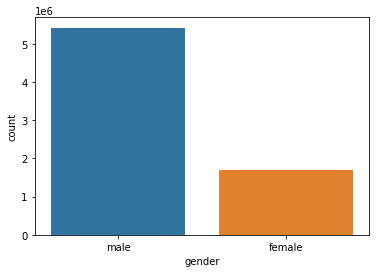

In [79]:
# compare male(Q6581097) and female(Q6581072) speakers
gender_speaker = speaker[(speaker.gender == "Q6581097") | (speaker.gender == "Q6581072")]
sns.countplot(data=gender_speaker, x="gender").set_xticklabels(["male", "female"])



In [75]:
# compare speakers from US(Q30), UK(Q145), AU(Q408), CA(Q16), NZ(Q664)

nations=['Q30','Q145','Q408','Q16','Q664']
speaker1=speaker.explode(column="nationality")
speaker1=speaker1[speaker1['nationality'].isin(nations)]

In [76]:
speaker1.nationality

0           Q30
1          Q145
3           Q30
8           Q16
8           Q30
           ... 
9055974     Q30
9055975     Q30
9055976     Q30
9055977     Q30
9055980     Q30
Name: nationality, Length: 765734, dtype: object

[Text(0, 0, 'US'),
 Text(1, 0, 'UK'),
 Text(2, 0, 'AU'),
 Text(3, 0, 'CA'),
 Text(4, 0, 'NZ')]

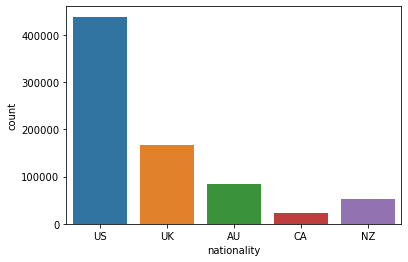

In [78]:
sns.countplot(data=speaker1, x="nationality").set_xticklabels(["US", "UK", "AU", "CA", "NZ"])

In [80]:
# compare speakers who are politicians(Q82955)

speaker2 = speaker.explode(column="occupation")